# Evaluate Results

Average = weighted

Precision = 0.668
Recall = 0.369
F1 = 0.418
              precision    recall  f1-score   support

         FUN       0.80      0.23      0.36       412
         STR       0.80      0.49      0.61       535
         MIX       0.21      0.04      0.07       176
         OTH       0.11      0.99      0.19        77

    accuracy                           0.37      1200
   macro avg       0.48      0.44      0.31      1200
weighted avg       0.67      0.37      0.42      1200



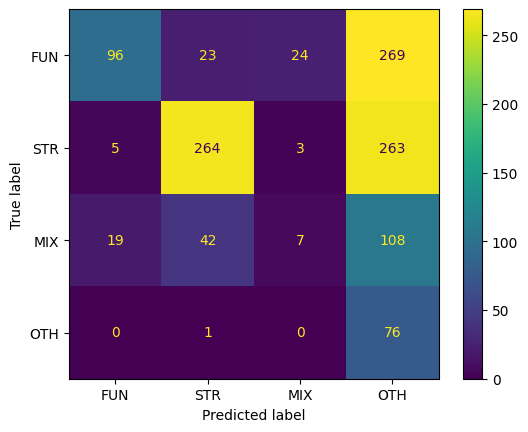

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import ast

# Set file to analyse
#file_name = "gpt-3.5-turbo_prompt3"
file_name = "gpt-4o_prompt3"
file_name = "Llama-3.1-8B_prompt3"
file_name = "Llama-3.1-8B-Instruct_prompt3"

# Import data
file_path = f"/home/fantoni/patent-sentence-classification/results/prompting/{file_name}.xlsx"
result_df = pd.read_excel(file_path)

# Set labels
display_labels = ['FUN', 'STR', 'MIX', 'OTH']
true_labels = result_df['true_class']  
predicted_labels = result_df['pred_class']

# Calculate classification metrics
average = 'weighted'
precision = precision_score(true_labels, predicted_labels, average=average, zero_division=0)
recall = recall_score(true_labels, predicted_labels, average=average, zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average=average, zero_division=0)
print(f'Average = {average}\n')
print(f'Precision = {precision:.3f}')  
print(f'Recall = {recall:.3f}')  
print(f'F1 = {f1:.3f}') 

# Save Classification Report
class_report = classification_report(true_labels, predicted_labels, labels=display_labels, target_names=display_labels, zero_division=0)
print(class_report)
#output_file_path = f"/home/fantoni/patent-sentence-classification/results/prompting/{file_name}.txt"
#with open(output_file_path, "w") as f:
#    f.write("Classification Report:\n")
#    f.write(class_report)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=display_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot()
plt.show()

# Time Analysis

In [2]:
# Time Analysis
avg_time_per_sent = result_df['elapsed_time_sec'].sum()/len(result_df)
total_time = result_df['elapsed_time_sec'].sum()
print(f"Time per sentence (avg) = {avg_time_per_sent:.2f}")
print(f"Total time (sec) = {total_time:.2f}")
print(f"Total time (min) = {total_time/60:.2f}")

Time per sentence (avg) = 0.31
Total time (sec) = 377.14
Total time (min) = 6.29


# Cost Analysis
To calculate cost: https://openai.com/api/pricing/

In [18]:
import tiktoken

def count_tokens(text):
    encoding = tiktoken.get_encoding("cl100k_base")
    return len(encoding.encode(text))

def calculate_cost(input_tokens, output_tokens, input_price, output_price):
    cost_prompt = input_tokens * input_price/1000000
    cost_output = output_tokens * output_price/1000000
    return cost_prompt + cost_output

# Calculate number of output tokens
result_df['output_tokens'] = result_df['pred_class'].apply(count_tokens)

# Set pricing based on model:
# 1. gpt-4o
input_price = 2.50
output_price = 10
# 2. gpt-3.5-turbo
#input_price = 3
#output_price = 6
# 3. gpt-3.5-turbo-0125
#input_price = 0.5
#output_price = 1.5

# Calculate cost per sentence
result_df['cost_per_sent'] = result_df.apply(
    lambda row: calculate_cost(row['prompt_tokens'], row['output_tokens'], input_price=input_price, output_price=output_price),
    axis=1
)

# Calculate total cost
total_cost = result_df['cost_per_sent'].sum()
print(f"Total cost for {len(result_df)} sentences = {total_cost:.2f}$")


Total cost for 1200 sentences = 0.62$


In [ ]:
# Simulate cost of prompt

# Set parameters
input_tokens = 200 
output_tokens = 3
n_sentence = 600

# gpt-4o
cost_prompt = input_tokens * 2.50/1000000
cost_output = output_tokens * 10/1000000

# gpt-3.5-turbo
cost_prompt = input_tokens * 3/1000000
cost_output = output_tokens * 6/1000000

# gpt-3.5-turbo-0125
cost_prompt = input_tokens * 0.5/1000000
cost_output = output_tokens * 1.5/1000000

print(f"Cost Prompt: {cost_prompt:.5f}$")
print(f"Cost Output: {cost_output:.5f}$")
print(f"Tot. Cost per Sentence: {cost_prompt + cost_output:.5f}$")
print(f"Tot. Cost for {n_sentence} Sentence: {(cost_prompt + cost_output)*n_sentence:.2f}$")